### Texas Hold'em Pre-Flop Statistical Analysis

Purpose: Analyze Correlation between Pre-Flop Betting Strategy and Profit

Method: K-Nearest Neighbor Model

In [1]:
# Load libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

# Organizing and Summarizing Data

In [2]:
# Create header and display dataframe
col_names = ["PlayerAlias", "PokerSite", "Hands", "NetWon", "VPIP", "PFR", "ThreeBet", "PostflopAgg", "WWSF", "WTSD", "WonAtSD", "Wins", "Losses", "VsPlayer"]
df = pd.read_csv("PokerPlayerStatistics.csv", header=0, names=col_names)
print(df)

        PlayerAlias  PokerSite  Hands  NetWon  ...   WonAtSD  Wins  Losses  VsPlayer
0          Player 1         19    155  -51.45  ...  0.428571   NaN     NaN       NaN
1          Player 2          1    176  -23.32  ...  0.307692   NaN     NaN       NaN
2          Player 3          1   3171  108.30  ...  0.556391   NaN     NaN       NaN
3          Player 4          1     70    2.53  ...  0.250000   NaN     NaN       NaN
4          Player 5          2    241   42.23  ...  0.818182   NaN     NaN       NaN
...             ...        ...    ...     ...  ...       ...   ...     ...       ...
32622  Player 32623         19    433  -52.35  ...  0.500000   NaN     NaN       NaN
32623  Player 32624          2     46    4.30  ...  0.000000   NaN     NaN       NaN
32624  Player 32625          2  12914    5.47  ...  0.511574   NaN     NaN       NaN
32625  Player 32626          1    109  -16.17  ...  0.166667   NaN     NaN       NaN
32626  Player 32627          2     83   13.83  ...  1.000000   Na

In [3]:
# Drop unnecessary columns 
df.drop(["PokerSite", "PostflopAgg", "WWSF", "WTSD", "WonAtSD", "Wins", "Losses", "VsPlayer"], axis = 1, inplace = True)
print(df)

        PlayerAlias  Hands  NetWon      VPIP       PFR  ThreeBet
0          Player 1    155  -51.45  0.200000  0.154839  0.021277
1          Player 2    176  -23.32  0.420455  0.096591  0.015385
2          Player 3   3171  108.30  0.196783  0.121728  0.034636
3          Player 4     70    2.53  0.228571  0.142857  0.076923
4          Player 5    241   42.23  0.232365  0.082988  0.027027
...             ...    ...     ...       ...       ...       ...
32622  Player 32623    433  -52.35  0.260970  0.210162  0.136646
32623  Player 32624     46    4.30  0.173913  0.043478  0.043478
32624  Player 32625  12914    5.47  0.130943  0.119018  0.061377
32625  Player 32626    109  -16.17  0.247706  0.091743  0.021277
32626  Player 32627     83   13.83  0.253012  0.132530  0.000000

[32627 rows x 6 columns]


In [4]:
# Define variables 

# 'Hands' represents the number of hands each player has played
# 'NetWon' represents the total profit of the player
# 'VPIP' stands for "voluntary put $ in pot" and represents the perentage of hands the player plays
# 'PFR' stands for stands for "preflop raiser” and represents the perecentage of hands a player raises on the first betting round
# 'ThreeBet' represents the percentage of times a player raises an opponent who has already raised 


In [5]:
# Check data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32627 entries, 0 to 32626
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PlayerAlias  32627 non-null  object 
 1   Hands        32627 non-null  int64  
 2   NetWon       32627 non-null  float64
 3   VPIP         32627 non-null  float64
 4   PFR          32627 non-null  float64
 5   ThreeBet     32627 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB


In [6]:
# Display descriptive statistics
df.describe()

,Hands,NetWon,VPIP,PFR,ThreeBet
count,32627.000000,32627.000000,32627.000000,32627.000000,32627.000000
mean,565.406075,-5.881063,0.308935,0.113833,0.042632
std,2082.194746,46.435680,0.155459,0.069700,0.049120
min,40.000000,-1059.440000,0.000000,0.000000,0.000000
25%,63.000000,-20.215000,0.188571,0.067308,0.000000
50%,111.000000,-5.120000,0.280000,0.105603,0.033333
75%,261.000000,9.070000,0.395349,0.147841,0.059406
max,77109.000000,785.480000,0.984375,0.975610,0.962963


In [7]:
# Remove inputs with less than 500 hands 
df_filtered = df.query("Hands >= 500")
print(df_filtered)
df_filtered.describe()

        PlayerAlias  Hands  NetWon      VPIP       PFR  ThreeBet
2          Player 3   3171  108.30  0.196783  0.121728  0.034636
16        Player 17   1057 -269.21  0.319773  0.243141  0.094972
18        Player 19   8165   18.91  0.166197  0.128843  0.039577
21        Player 22   7665 -150.60  0.111155  0.079061  0.026190
26        Player 27   3827  137.66  0.134831  0.019859  0.017544
...             ...    ...     ...       ...       ...       ...
32570  Player 32571    532   14.45  0.125940  0.099624  0.066667
32572  Player 32573    792  -12.82  0.296717  0.131313  0.010638
32575  Player 32576   1870   53.45  0.189840  0.089840  0.006299
32608  Player 32609    558  -31.74  0.148746  0.105735  0.021858
32624  Player 32625  12914    5.47  0.130943  0.119018  0.061377

[4876 rows x 6 columns]


,Hands,NetWon,VPIP,PFR,ThreeBet
count,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000
mean,3036.940935,-2.606362,0.197321,0.107808,0.038541
std,4666.324201,101.302701,0.088597,0.041892,0.021264
min,500.000000,-754.970000,0.049180,0.000000,0.000000
25%,739.000000,-50.880000,0.137691,0.083455,0.024267
50%,1290.500000,-5.035000,0.169606,0.106993,0.036773
75%,3177.250000,41.052500,0.230314,0.129158,0.050000
max,77109.000000,785.480000,0.928986,0.393740,0.218750


In [8]:
# Isolate most profitable quartile 
df_winning = df_filtered.query("NetWon >= 41.0525")
df_winning.describe()

,Hands,NetWon,VPIP,PFR,ThreeBet
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,4820.944217,114.787646,0.180534,0.114658,0.042136
std,6090.865997,88.748800,0.071095,0.035827,0.018440
min,504.000000,41.090000,0.064988,0.003058,0.000000
25%,1097.500000,58.450000,0.136893,0.093642,0.030540
50%,2375.000000,85.670000,0.159624,0.112521,0.040724
75%,5972.500000,135.445000,0.197849,0.132155,0.052495
max,54396.000000,785.480000,0.559561,0.357060,0.138728


In [9]:
# Isolate least profitable quartile 
df_losing = df_filtered.query("NetWon <= -50.88")
df_losing.describe()

,Hands,NetWon,VPIP,PFR,ThreeBet
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,3461.172272,-115.004569,0.219286,0.109140,0.039065
std,5164.110468,74.043769,0.105082,0.044725,0.022216
min,502.000000,-754.970000,0.065071,0.000727,0.000000
25%,867.000000,-133.350000,0.143749,0.082251,0.024600
50%,1668.000000,-91.070000,0.188288,0.108064,0.036545
75%,3899.500000,-67.745000,0.270098,0.131323,0.050550
max,77109.000000,-50.910000,0.928986,0.393740,0.218750


# Visualizing Data

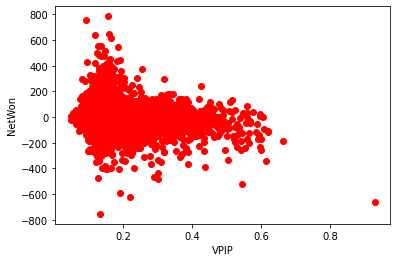

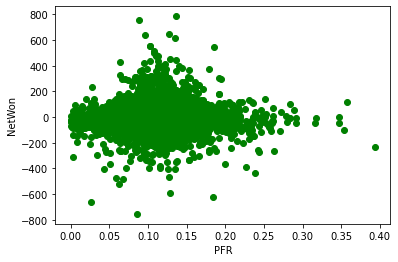

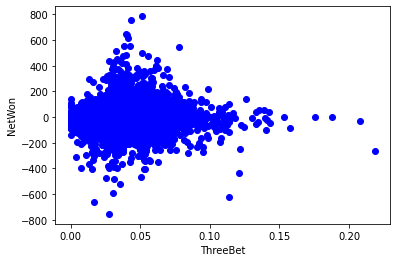

In [10]:
# Visualize Data 
# VPIP
x = df_filtered["VPIP"]
y = df_filtered["NetWon"]
plt.scatter(x,y, color = "red")
plt.xlabel("VPIP")
plt.ylabel("NetWon")
plt.show()
# PFR
x = df_filtered["PFR"]
plt.scatter(x,y, color = "green")
plt.xlabel("PFR")
plt.ylabel("NetWon")
plt.show()
# ThreeBET
x = df_filtered["ThreeBet"]
plt.scatter(x,y, color = "blue")
plt.xlabel("ThreeBet")
plt.ylabel("NetWon")
plt.show()

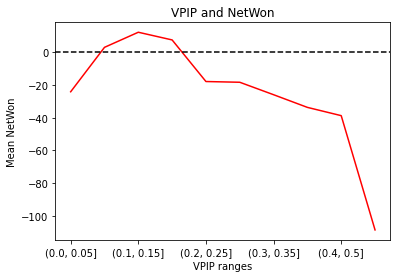

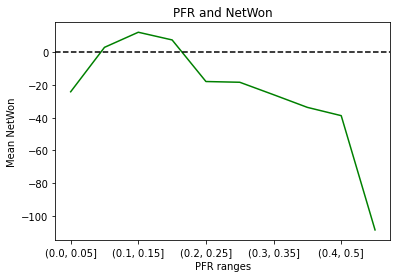

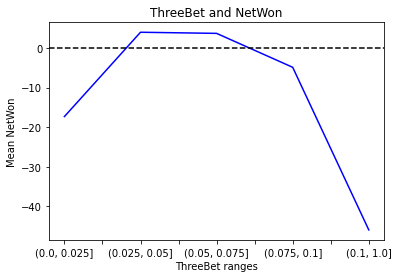

In [27]:
# Group and revisualize data
# VPIP
vpipBins = pd.cut(df_filtered["VPIP"], [0, .05, .1, .15, .2, .25, .3, .35, .4, .5, 1])
df_filtered.groupby(vpipBins)["NetWon"].mean().plot(color = "red")
plt.title("VPIP and NetWon")
plt.xlabel("VPIP ranges")
plt.ylabel("Mean NetWon")
plt.axhline(y=0, color = "black", linestyle='--')
plt.show()
# PFR
pfrBins = pd.cut(df_filtered["PFR"], [0, .05, .1, .15, .2, .25, 1])
df_filtered.groupby(vpipBins)["NetWon"].mean().plot(color = "green")
plt.title("PFR and NetWon")
plt.xlabel("PFR ranges")
plt.ylabel("Mean NetWon")
plt.axhline(y=0, color = "black", linestyle='--')
plt.show()
# ThreeBet
threebetBins = pd.cut(df_filtered["ThreeBet"], [0, .025, .05, .075, .1, 1])
df_filtered.groupby(threebetBins)["NetWon"].mean().plot(color = "blue")
plt.title("ThreeBet and NetWon")
plt.xlabel("ThreeBet ranges")
plt.ylabel("Mean NetWon")
plt.axhline(y=0, color = "black", linestyle='--')
plt.show()

# Splitting and Binning Data

In [12]:
# Split dataset into training set and validation set
# 80% training and 20% validation
x = df_filtered[["VPIP","PFR","ThreeBet"]]
y = df_filtered[["NetWon"]]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
# Bin data
binx = KBinsDiscretizer(n_bins=50,strategy='uniform')
x_train_bin = binx.fit_transform(x_train)
x_validation_bin = binx.transform(x_validation)

biny = KBinsDiscretizer(n_bins=10,strategy='uniform',encode = 'ordinal')
y_train_bin = biny.fit_transform(y_train)
y_validation_bin = biny.transform(y_validation)

# Training and Testing the Model

In [ ]:
# create Nearest Neighbor Classifier using 3 nearest neighbors
classifier = KNeighborsClassifier(n_neighbors = 60)
classifier.fit(x_train_bin, y_train_bin)


In [15]:
# Predict for validation set
y_predict_validation = classifier.predict(x_validation_bin)

In [16]:
# Compute the accuracy score
accuracy = accuracy_score(y_predict_validation, y_validation_bin)
print("Accuracy = ", accuracy)

Accuracy =  0.5584016393442623


# Findings



*   We found there to be a very clear correlation between pre-flop action and profit
*   VPIP

    *   The optimal range of VPIP was found to be 10-15%

    *   Losing players tended to have much higher VPIP levels which displays the significance of limiting the amount of hands a player plays


*   PFR

    *   The optimal range of PFR was also found to be 10-15%
    *   Losing players tended to have lower PFR levels which displays the negative effects of their passive play

    *   Raising is extremely important to limit the number of players in the pot and increase potential value


*   ThreeBet
    *   The most profitbale three bet range was shown to be between 2.5-7.5%
    *   This displays the important of agression and building the pot when a player has an exceptional hand

    *   Three bet percentage did not very much on average between winning and losing players, but deviance from this mean was shown to have detrimental effects on profit

*   The pre-flop statistic ranges that contained profitable players on average were limited to very small windows showing the importance of optimizing these values  


*   The ability of our model to accuracetly predict a player's profit based on these statistics also displays the significance of pre-flop play when it comes to success in the game of Texas Hold'em




















